In [2]:
# pip install deap

imports

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import numpy as np

In [4]:


# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the evaluation function
def evaluate_fitness(individual):
    # Select features based on the individual's chromosome
    selected_features = np.asarray(individual, dtype=bool)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    
    # Train a classifier using the selected features
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_selected, y_train)
    
    # Evaluate the classifier's accuracy on the test set
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Return the accuracy as the fitness value
    return accuracy,

# Create the DEAP toolbox
toolbox = base.Toolbox()

# Create the fitness and individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the genetic operators
toolbox.register("attr_bool", np.random.choice, [True, False])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X[0]))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the main evolutionary loop
def main():
    population = toolbox.population(n=50)
    num_generations = 10
    
    for gen in range(num_generations):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
        fitnesses = toolbox.map(toolbox.evaluate, offspring)
        for ind, fit in zip(offspring, fitnesses):
            ind.fitness.values = fit
        
        population = toolbox.select(offspring, k=len(population))
        
        # Print the best individual in the current generation
        best_individual = tools.selBest(population, k=1)[0]
        print(f"Generation {gen+1}: Best Accuracy = {best_individual.fitness.values[0]:.4f}")
    
    best_individual = tools.selBest(population, k=1)[0]
    print(f"\nBest Individual:\n{best_individual}")
    print(f"Best Accuracy: {best_individual.fitness.values[0]:.4f}")

if __name__ == "__main__":
    main()


Generation 1: Best Accuracy = 0.9100
Generation 2: Best Accuracy = 0.9100
Generation 3: Best Accuracy = 0.9100
Generation 4: Best Accuracy = 0.9100
Generation 5: Best Accuracy = 0.9150
Generation 6: Best Accuracy = 0.9150
Generation 7: Best Accuracy = 0.9150
Generation 8: Best Accuracy = 0.9150
Generation 9: Best Accuracy = 0.9150
Generation 10: Best Accuracy = 0.9150

Best Individual:
[np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.False_]
Best Accuracy: 0.9150


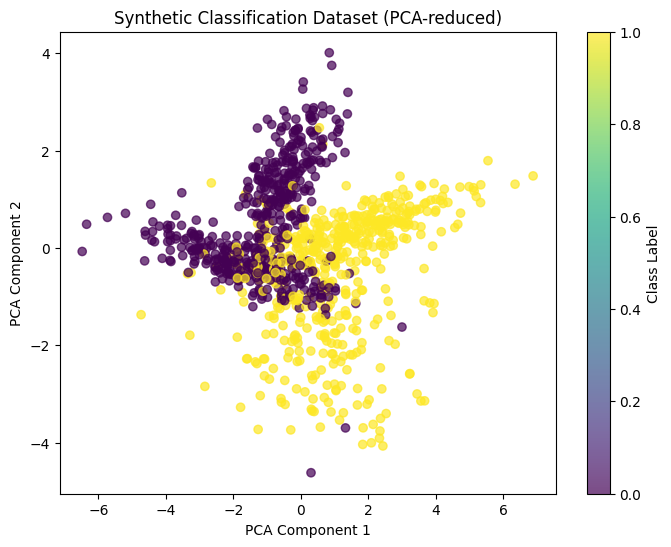

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the data points with colors representing their classes
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Class Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Synthetic Classification Dataset (PCA-reduced)')
plt.show()


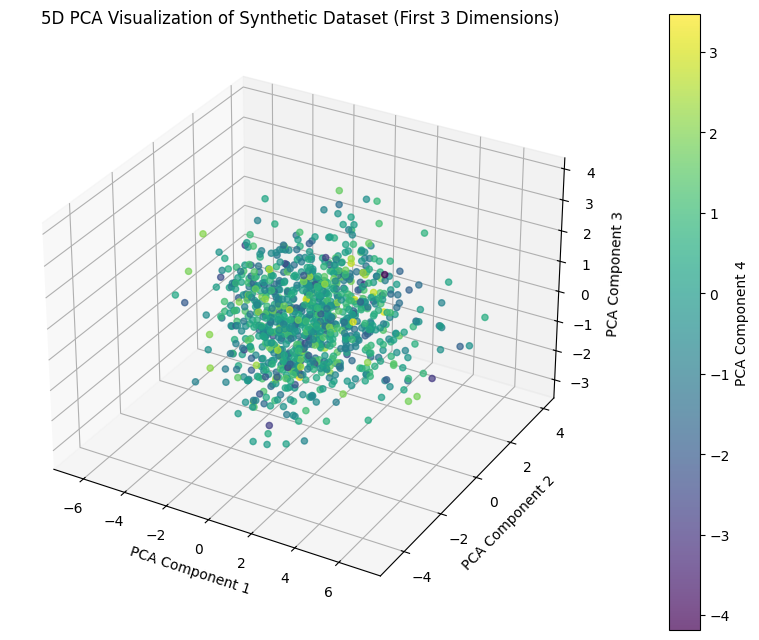

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce the dataset to 5 dimensions
X_reduced_5d = PCA(n_components=5).fit_transform(X)

# Create a 3D plot of the first three PCA components, with color based on the fourth component
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced_5d[:, 0], X_reduced_5d[:, 1], X_reduced_5d[:, 2], 
                     c=X_reduced_5d[:, 3], cmap='viridis', alpha=0.7)

# Add color bar and axis labels
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, label='PCA Component 4')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('5D PCA Visualization of Synthetic Dataset (First 3 Dimensions)')
plt.show()


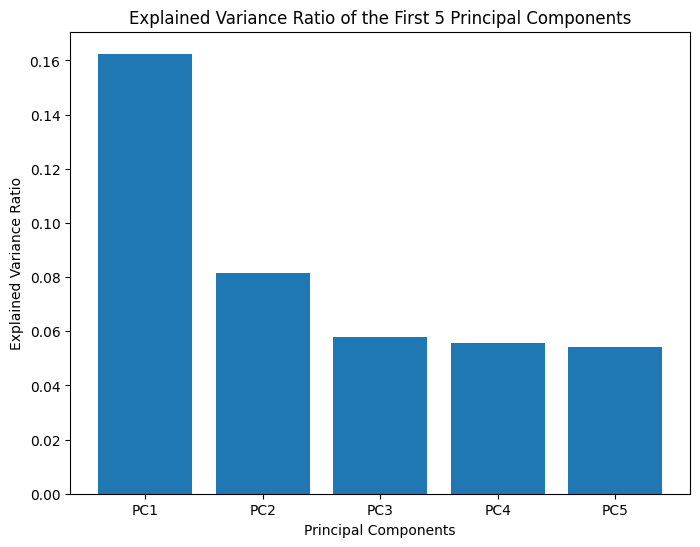

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to analyze the first five components
pca = PCA(n_components=5)
pca.fit(X)

# Plotting explained variance ratio for the first five principal components
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), pca.explained_variance_ratio_, tick_label=[f'PC{i}' for i in range(1, 6)])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of the First 5 Principal Components')
plt.show()
